# EDA

In [ ]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from utils import *
sns.set_theme(context='notebook', style=plt.style.use('dark_background'))

In [2]:
data = pd.read_csv('../src/data/preprocessed_data.csv')

print("--- Shape of the dataset ---\n")
print(f"Number of rows {data.shape[0]}")
print(f"Number of columns {data.shape[1]}\n")
data.info()

--- Shape of the dataset ---

Number of rows 659
Number of columns 19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   a1_score         659 non-null    int64  
 1   a2_score         659 non-null    int64  
 2   a3_score         659 non-null    int64  
 3   a4_score         659 non-null    int64  
 4   a5_score         659 non-null    int64  
 5   a6_score         659 non-null    int64  
 6   a7_score         659 non-null    int64  
 7   a8_score         659 non-null    int64  
 8   a9_score         659 non-null    int64  
 9   a10_score        659 non-null    int64  
 10  age              659 non-null    int64  
 11  gender           659 non-null    float64
 12  ethnicity        659 non-null    object 
 13  jundice          659 non-null    int64  
 14  family           659 non-null    int64  
 15  country_of_res   659 non-null    obje

In [3]:
data.head()

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,ethnicity,jundice,family,country_of_res,used_app_before,relation,asd
0,1,1,1,1,0,0,1,1,0,0,26,0.0,white-european,0,0,united states,0,self,0
1,1,1,0,1,0,0,0,1,0,1,24,1.0,latino,0,1,brazil,0,self,0
2,1,1,0,1,1,0,1,1,1,1,27,1.0,latino,1,1,spain,0,parent,1
3,1,1,0,1,0,0,1,1,0,1,35,0.0,white-european,0,1,united states,0,self,0
4,1,0,0,0,0,0,0,1,0,0,40,0.0,unknown,0,0,egypt,0,unknown,0


In [4]:
continuous, discretes, categoricals, temporary, possible_mixed = classify_variables(data)
print("\n")
print(f"--- Continuous values ---\n{continuous}")
print("\n")
print(f"--- Categorical values ---\n{categoricals}")
print("\n")
print(f"--- Discretes values ---\n{discretes}")

	Type of Variables
There are 1 continous variables
There are 15 discrete variables
There are 3 categorical variables
There are 0 temporary variables
There are 0 possible mixed variables


--- Continuous values ---
['age']


--- Categorical values ---
['ethnicity', 'country_of_res', 'relation']


--- Discretes values ---
['a1_score', 'a2_score', 'a3_score', 'a4_score', 'a5_score', 'a6_score', 'a7_score', 'a8_score', 'a9_score', 'a10_score', 'gender', 'jundice', 'family', 'used_app_before', 'asd']


In [5]:
#Estadísticas descriptivas variables categóricas
data[categoricals].describe()

,ethnicity,country_of_res,relation
count,659,659,659
unique,11,65,6
top,white-european,united states,self
freq,214,109,487


In [6]:
data[continuous + discretes].describe()

,age,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,gender,jundice,family,used_app_before,asd
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000
mean,29.084977,0.719272,0.447648,0.447648,0.487102,0.496206,0.285281,0.415781,0.658574,0.321700,0.562974,0.523520,0.100152,0.132018,0.016692,0.268589
std,9.609016,0.449696,0.497629,0.497629,0.500213,0.500365,0.451891,0.493231,0.474548,0.467483,0.496395,0.499826,0.300430,0.338768,0.128212,0.443562
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1. Univariate Analysis

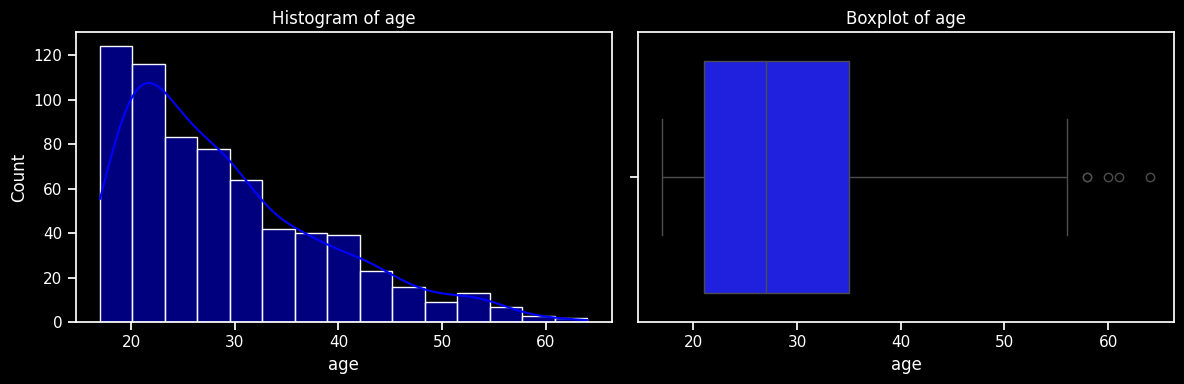

In [7]:
for col in continuous:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True, color="blue", edgecolor='ghostwhite')
    plt.title(f"Histogram of {col}")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col], color="blue")
    plt.title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()


The dataset primarily consists of younger individuals. There are a few outliers, which represent individuals older than the typical age range

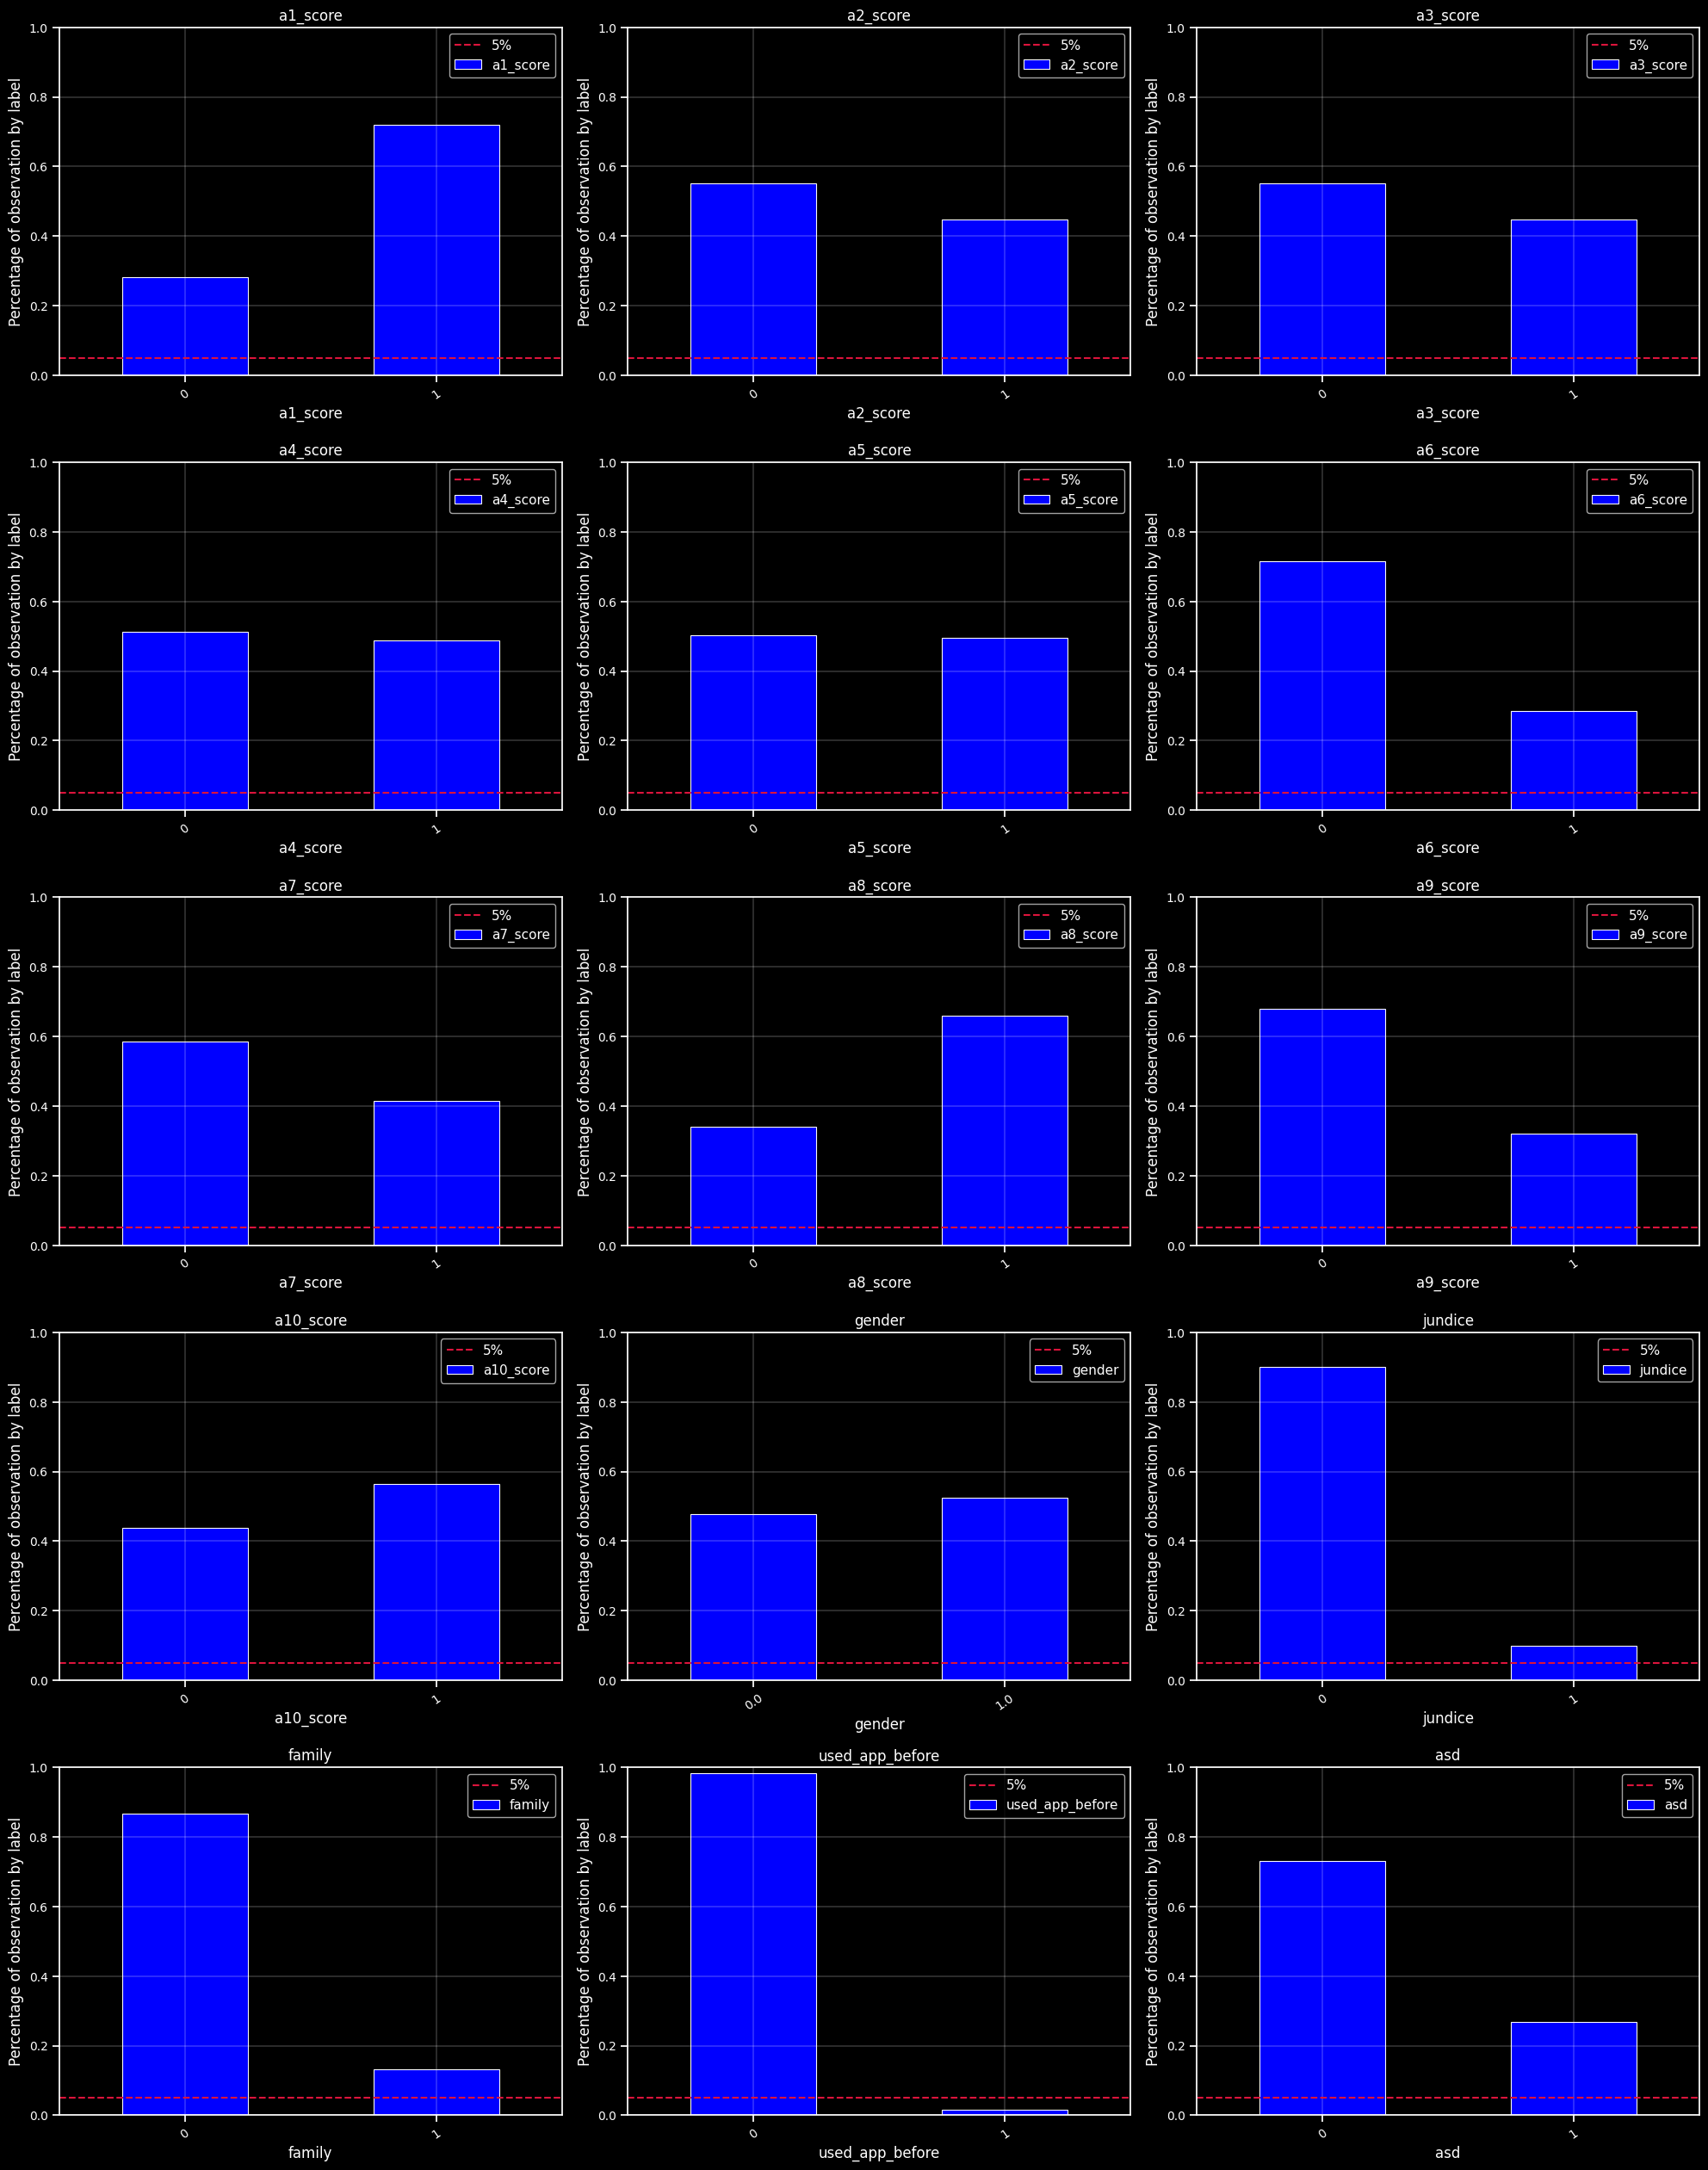

In [8]:
num_vars = len(discretes)
rows = (num_vars + 1) // 2
plt.figure(figsize=(20, rows * 5))

# Plot each discrete variable in a subplot
for i, var in enumerate(discretes):
    plt.subplot(rows, 3, i + 1)
    (data.groupby(var)[var].count() / len(data)).plot.bar(color='blue', width=0.5, edgecolor='ghostwhite', lw=0.8)
    plt.title(var)
    plt.xticks(fontsize=10, rotation=35)
    plt.axhline(0.05, color='crimson', ls='dashed', lw=1.5, label='5%')
    plt.ylabel('Percentage of observation by label', fontsize=12)
    plt.yticks(fontsize=10)
    plt.ylim(0, 1)
    plt.grid(color='white', linestyle='-', linewidth=0.25)
    plt.legend()
    plt.tight_layout()

plt.show()

We can see that there is imbalanced problem in variables such as jundice, family, used_app_before.

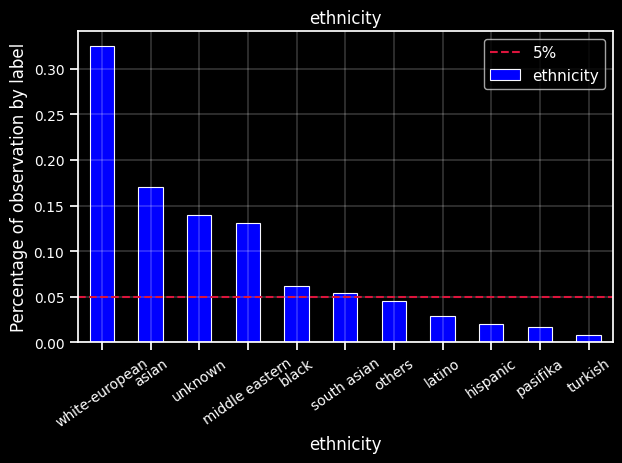

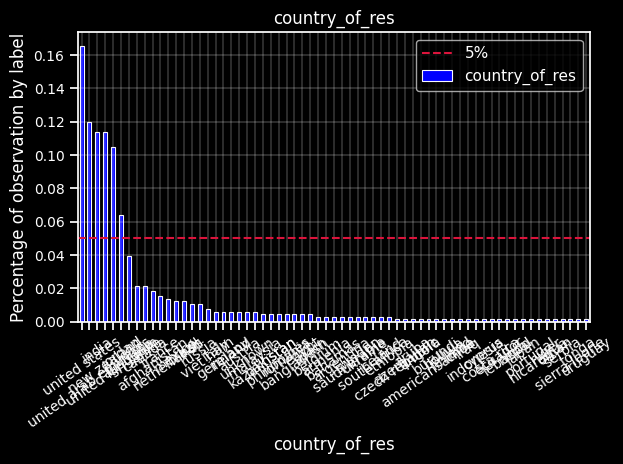

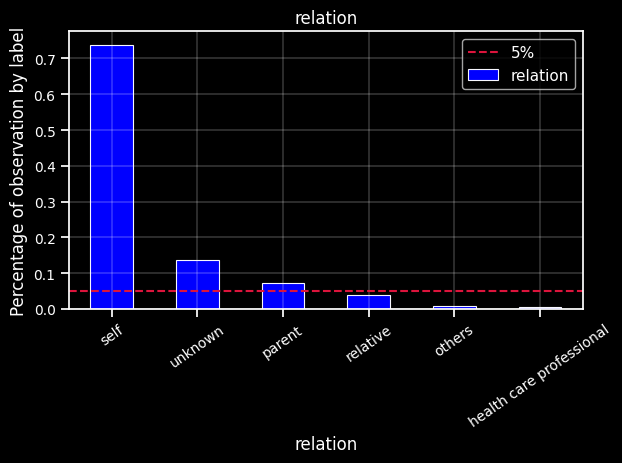

In [9]:
for var in categoricals:
    (data.groupby(var)[var].count() / len(data)).sort_values(ascending=False).plot.bar(color='blue', width=0.5, edgecolor='ghostwhite', lw=0.8)
    plt.title(var)
    plt.xticks(fontsize=10, rotation=35)
    plt.axhline(0.05, color='crimson', ls='dashed', lw=1.5, label='5%')
    plt.ylabel('Percentage of observation by label', fontsize=12)
    plt.yticks(fontsize=10)
    # plt.ylim(0, 0.8)
    plt.grid(color='white', linestyle='-', linewidth=0.25)
    plt.legend()
    plt.tight_layout()
    plt.show()

We can see variables with too many labels. This leads in a problem because it may introduce noise, so that reducing cardinality may help to improve model performace.

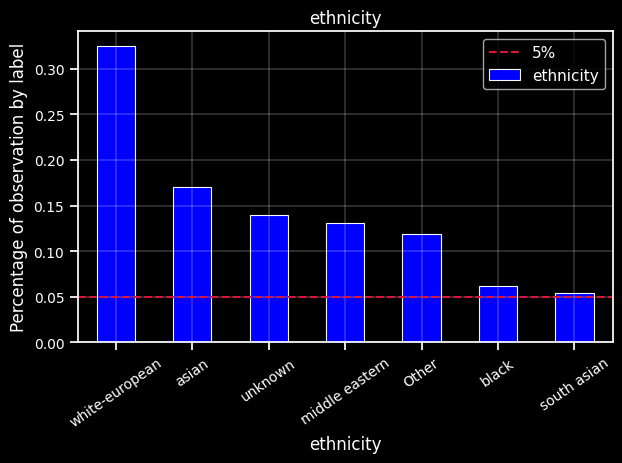

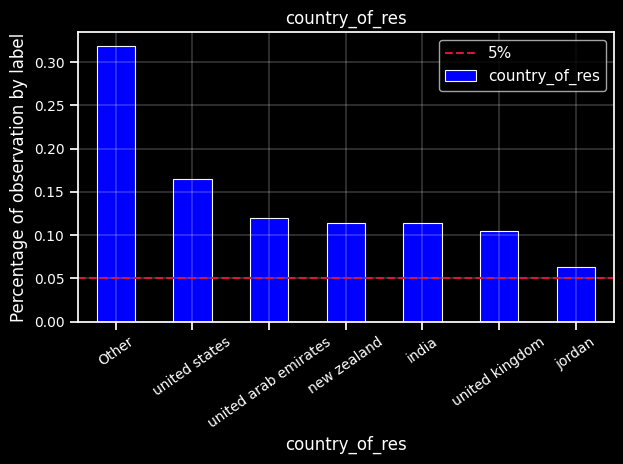

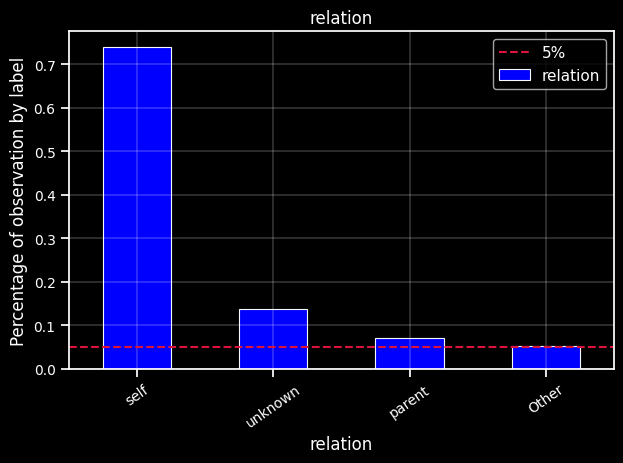

In [10]:
for var in categoricals:
    freq = data[var].value_counts(dropna=False, normalize=True)
    others_category = freq[freq < 0.05].index
    data[var] = data[var].apply(lambda x: 'Other' if x in others_category else x)

for var in categoricals:
    (data.groupby(var)[var].count() / len(data)).sort_values(ascending=False).plot.bar(color='blue', width=0.5, edgecolor='ghostwhite', lw=0.8)
    plt.title(var)
    plt.xticks(fontsize=10, rotation=35)
    plt.axhline(0.05, color='crimson', ls='dashed', lw=1.5, label='5%')
    plt.ylabel('Percentage of observation by label', fontsize=12)
    plt.yticks(fontsize=10)
    # plt.ylim(0, 0.8)
    plt.grid(color='white', linestyle='-', linewidth=0.25)
    plt.legend()
    plt.tight_layout()
    plt.show()

Now we solved the cardinality problem

## 2. Bivariate Analysis

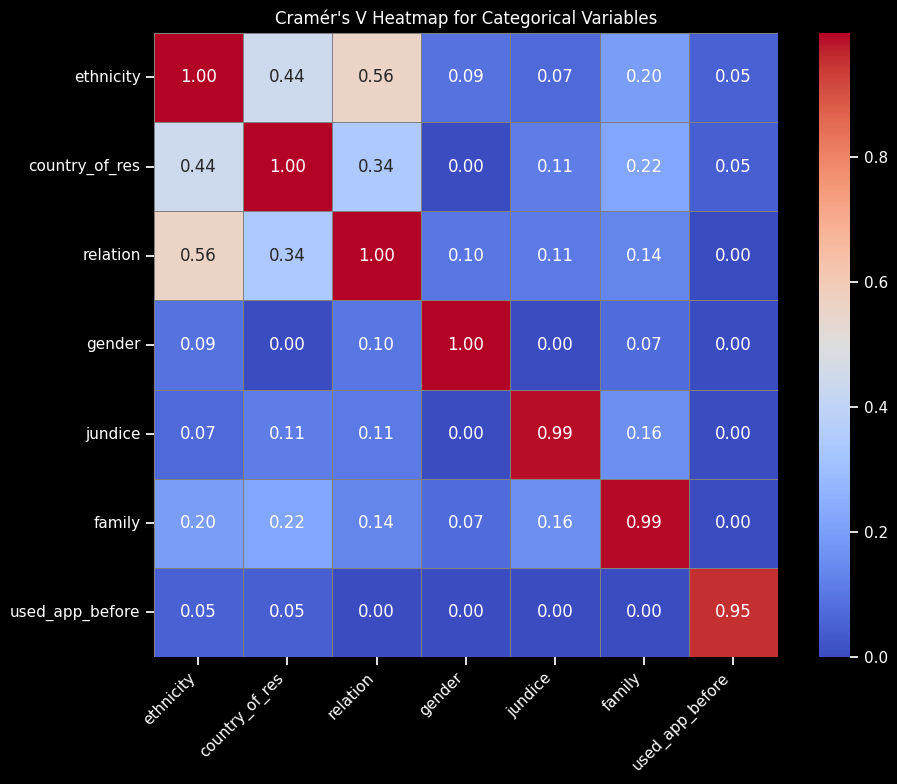

In [44]:
categorical_vars = ['ethnicity', 'country_of_res', 'relation', 'gender', 'jundice', 'family', 'used_app_before',]
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

# Calculate Cramér's V for each pair of variables
for var1 in categorical_vars:
    for var2 in categorical_vars:
        cramers_v_matrix.loc[var1, var2] = cramers_v(data[var1], data[var2])

# Ensure the matrix is numeric (convert to float)
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cramers_v_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Cramér's V Heatmap for Categorical Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


This heatmap allows to see the associations between categorical variables. We can see that there is a moderate association between relation and country_of_res with ethnicity. MOreover, variables like gender, used_app_before, and jundice tend to show no associations with other features.


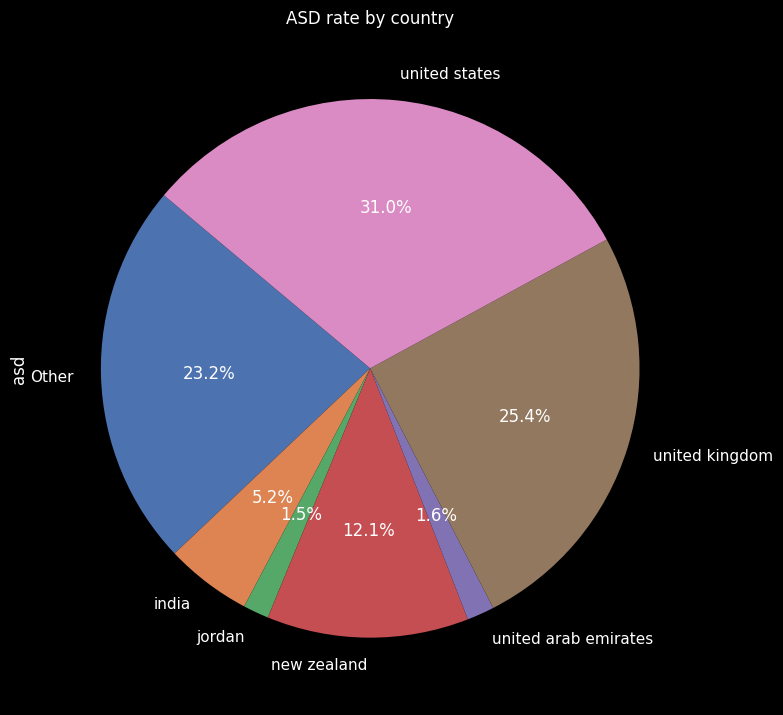

In [12]:
asd_by_country = data.groupby('country_of_res')['asd'].mean()
asd_by_country.plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('ASD rate by country')
plt.tight_layout()
plt.show()

We can see that United States and United Kingdom are the countries with people with autism

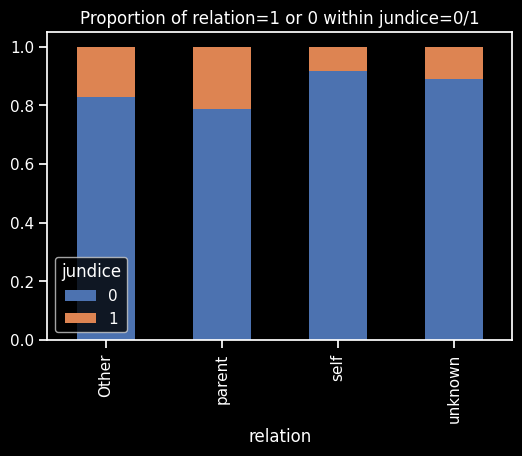

In [13]:
pd.crosstab(data["relation"], data["jundice"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(6,4)
)
plt.title("Proportion of relation=1 or 0 within jundice=0/1")
plt.show()

Across all relation categories, most individuals don't have jaundice

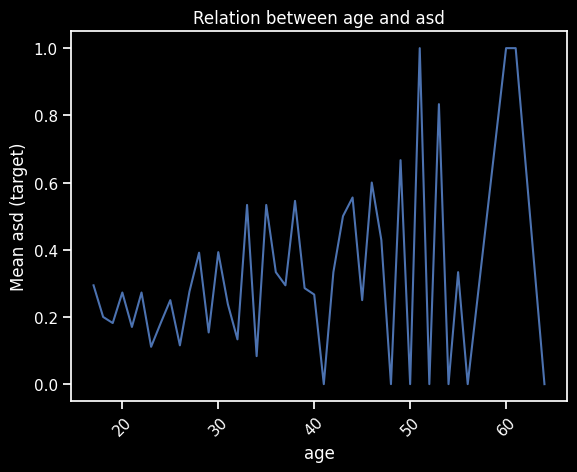

In [60]:
for var in continuous:
    plt.figure()
    fig = data.groupby([var])['asd'].mean().plot()
    fig.set_title('Relation between {} and asd'.format(var))
    fig.set_ylabel('Mean asd (target)')
    plt.xticks(rotation=45)
    plt.show()